# Machine Learning : Prediction of House Price


<hr/>

Submitted by <br>
Name: **Janvi Agrawal** <br> 
<hr/>

# Project Overview

## Objectives:


Common Instructions:

1. Use Pandas to Import the Dataset
2. Do the necessary Exploratory Data Analysis
3. Use the train_test_split method available in SCIKIT to split the dataset into Train Dataset and Test Dataset.
4. Show the Regression Score, Intercept and other parameters etc in the Output
5. Use visualizations and plots wherever possible
6. Format the outputs neatly; Do Documentation, Data Set Description, Objectives, Observations, Conclusions etc as you have done in your previous lab

Questions:
1. What are your observations on the Dataset?
2. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?
3. Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20
4. During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?

Cases
Try to predict the rent of the below houses -
1. 1 BHK with 2 Baths in Portofino Street
2. Fully Furnished 2 BHK in School Street
3. Single Room anywhere in Lavasa


PS: For the "Cases" part, you may have to create a dataset and then use the same for prediction purposes
    
## Problem Defination:

    For above mentioned objectives, detailed analysis and predicting are being performed in this lab. And the purpose of the lab is to familiarize ourselves with LinearRegression() model in machine learning.
    
## Approach:

    Jupyter Notebook is used for the succesful execution of the lab!
    Approach which I followed is as follows:
        1. Identified various requirements of the lab as per sections and material available.
        2. Went through sections of this Lab to understand its purpose and detailed idea to satisfy the needs of the questions.

### 1. Use Pandas to Import the Dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("F:\MSC-DS\SEM-2\Machine Learning\LABS\LAB 3\HousePrices - Lab3.csv")

### 2. Do the necessary Exploratory Data Analysis

In [3]:
df.head(7)

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0
5,Minimum Budget Rooms,Portofino A,1 BHK,600.0,1,1,1,1500.0
6,Semi Furnished Single Room,School Street,1 BHK,654.0,1,1,0,1513.5


In [4]:
df.tail(7)

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
993,Super Furnished Villa,Portofino F,3 BHK,4000.0,3,6,1,66000.0
994,Super Furnished Villa,Portofino C,3 BHK,3761.0,3,6,2,66000.0
995,Super Furnished Villa,Portofino D,4 BHK,4900.0,4,6,3,70000.0
996,Super Furnished Villa,Portofino B,4 BHK,3750.0,4,5,0,76000.0
997,Super Furnished Villa,School Street,4 BHK,5270.0,4,5,3,80000.0
998,Super Furnished Villa,Portofino B,6 BHK,5100.0,7,6,3,90000.0
999,Super Furnished Villa,Portofino B,7 BHK,6300.0,6,6,3,96000.0


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BuildingType  1000 non-null   object 
 1   Location      1000 non-null   object 
 2   Size          1000 non-null   object 
 3   AreaSqFt      1000 non-null   float64
 4   NoOfBath      1000 non-null   int64  
 5   NoOfPeople    1000 non-null   int64  
 6   NoOfBalcony   1000 non-null   int64  
 7   RentPerMonth  1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [7]:
df.describe()

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1548.270010,2.661000,2.168000,1.544000,10476.633500
std,1345.141175,1.247251,0.959529,0.838312,10509.508971
min,375.000000,1.000000,1.000000,0.000000,1100.000000
25%,1090.000000,2.000000,2.000000,1.000000,4890.500000
50%,1270.000000,2.000000,2.000000,2.000000,7000.000000
75%,1664.250000,3.000000,2.000000,2.000000,11925.000000
max,35000.000000,11.000000,6.000000,3.000000,96000.000000


In [8]:
# for computing correlations
df.corr()

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
AreaSqFt,1.000000,0.375791,0.374907,0.206123,0.473022
NoOfBath,0.375791,1.000000,0.480063,0.258885,0.579693
NoOfPeople,0.374907,0.480063,1.000000,0.184932,0.782853
NoOfBalcony,0.206123,0.258885,0.184932,1.000000,0.193619
RentPerMonth,0.473022,0.579693,0.782853,0.193619,1.000000


In [9]:
for col in df.columns:
    display(df[col].value_counts().head(10))

Semi Furnished Single Room     274
Semi Furnished Flat            246
Fully Furnished Single Room    153
Minimum Budget Rooms           146
Semi Furnished Villa            63
Fully Furnished Flat            41
Super Furnished Single Room     25
Super Furnished Villa           21
Fully Furnished Villa           19
Super Furnished Flat            12
Name: BuildingType, dtype: int64

Clubview Road    213
Portofino B      173
School Street    138
Portofino D      105
Portofino C      103
Portofino A       95
Portofino H       62
Portofino E       54
Portofino G       26
Portofino F       22
Name: Location, dtype: int64

2 BHK    429
3 BHK    353
4 BHK    103
1 BHK     51
5 BHK     22
6 BHK     21
8 BHK      8
7 BHK      7
9 BHK      4
1 RK       2
Name: Size, dtype: int64

1200.0    63
1500.0    20
1000.0    17
1100.0    15
600.0     14
1600.0    13
950.0     10
1075.0    10
1800.0    10
1150.0     9
Name: AreaSqFt, dtype: int64

2     514
3     252
4      95
1      68
5      35
6      16
7      10
9       5
8       4
11      1
Name: NoOfBath, dtype: int64

2    574
1    192
3    165
4     27
5     27
6     15
Name: NoOfPeople, dtype: int64

2    393
1    380
3    126
0    101
Name: NoOfBalcony, dtype: int64

5500.0     21
4500.0     20
6500.0     20
9500.0     19
6000.0     18
15000.0    18
4000.0     18
7500.0     16
5000.0     16
7000.0     16
Name: RentPerMonth, dtype: int64

In [10]:
df.isnull().sum()

BuildingType    0
Location        0
Size            0
AreaSqFt        0
NoOfBath        0
NoOfPeople      0
NoOfBalcony     0
RentPerMonth    0
dtype: int64

### Visualization

### Box Plot

<AxesSubplot:xlabel='Size', ylabel='NoOfPeople'>

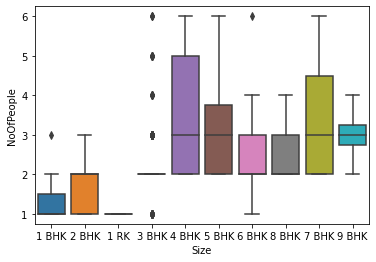

In [11]:
import seaborn as sns

sns.boxplot(x = 'Size', y = 'NoOfPeople', data = df)

From the above graph, we can visualize that:
1. Bottom black horizontal line of all box plot is minimum value
2. First black horizontal line of rectangle shape of all box plot is First quartile or 25%
3. Second black horizontal line of rectangle shape of all box plot is Second quartile or 50% or median.
4. Third black horizontal line of rectangle shape of all box plot is third quartile or 75%
5. Top black horizontal line of rectangle shape all blue box plot is maximum value.
6. Small diamond shape of all box plot is outlier data or erroneous data.

### Bar Chart

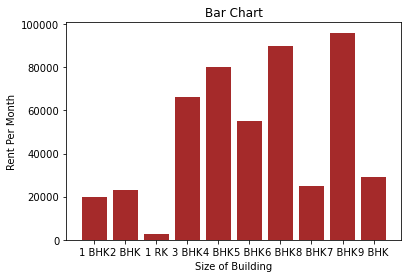

In [12]:
import matplotlib.pyplot as plt

# plotting a bar chart
plt.bar(df.Size,df.RentPerMonth,width = 0.8, color ="Brown")

# naming the x-axis
plt.xlabel('Size of Building')
# naming the y-axis
plt.ylabel('Rent Per Month')
plt.title("Bar Chart")

# function to show the plot
plt.show()


From the above graph, we can observe that:
1. 7BHK Building have Highest Rent per Month and
2. 1RK Building have Lowest Rent per Month.

### Count Plot

[Text(0, 0, 'Portofino H'),
 Text(1, 0, 'School Street'),
 Text(2, 0, 'Portofino B'),
 Text(3, 0, 'Portofino A'),
 Text(4, 0, 'Clubview Road'),
 Text(5, 0, 'Portofino C'),
 Text(6, 0, 'Portofino D'),
 Text(7, 0, 'Starter Homes'),
 Text(8, 0, 'Portofino G'),
 Text(9, 0, 'Portofino E'),
 Text(10, 0, 'Portofino F')]

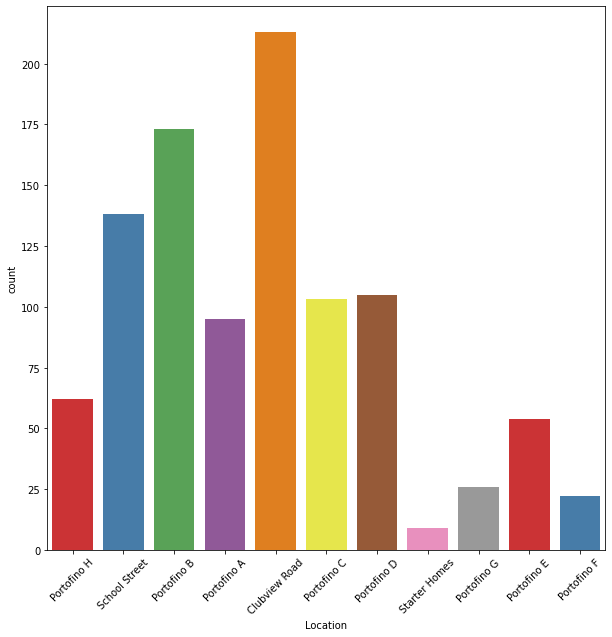

In [13]:
plt.figure(figsize=(10,10))
chart=sns.countplot(data=df,x='Location',palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

From the above hist, we can say that:
1. Clubview Road has the maximum count of Buildings and
2. Starter Homes has the minimum count of Buildings

### Scatter Plot

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comparison between various BuildingType based on AreaSqFt and RentPerMonth'}, xlabel='AreaSqFt', ylabel='RentPerMonth'>

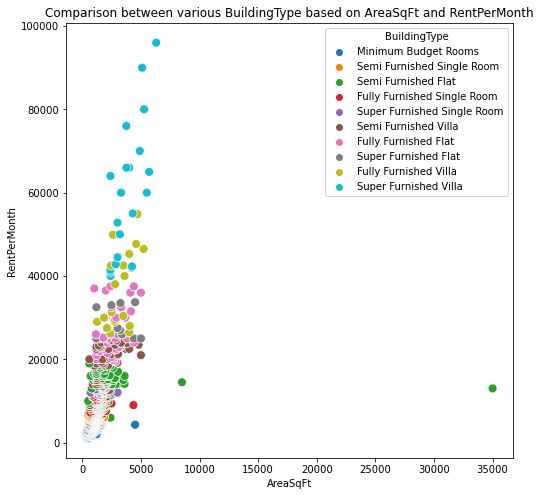

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.title("Comparison between various BuildingType based on AreaSqFt and RentPerMonth")
sns.scatterplot(df['AreaSqFt'],df['RentPerMonth'],hue =df['BuildingType'],s=80)

From the above scatter plot, we can observe that:
1. There is a positive relationship between AreaSqFt and RentPerMonth, i:e, as Area increases, Rent also increases.
2. We can also see that there are outliers in the data set.
3. Semi Furnished Villa are the Buildings which have maximum of Rent.

### Heat Map

[]

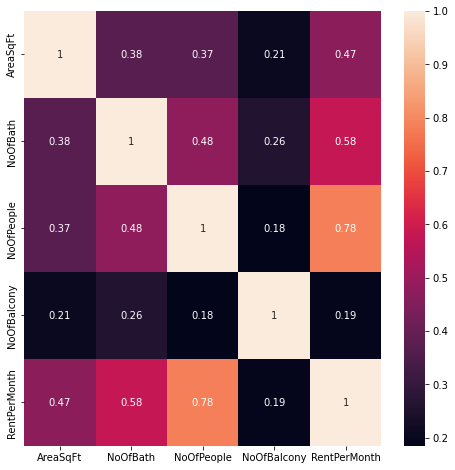

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.plot()

1. Each square shows the correlation between the variables on each axis.
2. Correlation ranges from -1 to +1.
3. Values closer to zero means there is no linear trend between the two variables.
4. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.
5. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.
6. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation).
7. For the rest the larger the number and darker the color the higher the correlation between the two variables.

From the above map, we can say that there a no corelation or a little relation between them.

### Pair Plot

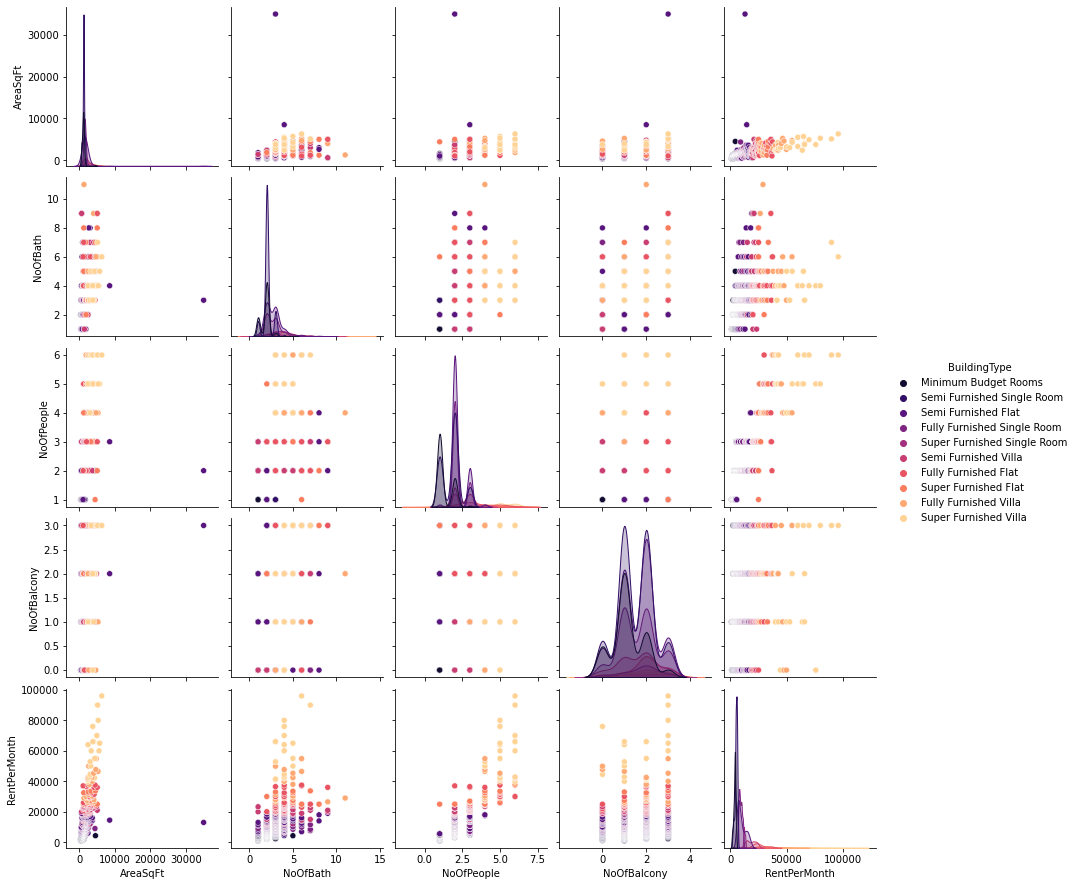

In [16]:
sns.pairplot(df, hue = 'BuildingType', palette = 'magma')

From the picture above, we can observe the variations in each plot. The plots are in matrix format where the row name represents x axis and column name represents the y axis. The main-diagonal subplots are the univariate histograms (distributions) for each attribute.

We can say that, AreaSqFt and RentPerMonth have the positive relationship.

We can also say that, there are outliers in the dataset.

### 3. Use the train_test_split method available in SCIKIT to split the dataset into Train Dataset and Test Dataset.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['BuildingType']= label_encoder.fit_transform(df['BuildingType'])
df['Location']= label_encoder.fit_transform(df['Location'])
df['Size']= label_encoder.fit_transform(df['Size'])


X=df.drop("RentPerMonth",axis=1)
y=df.RentPerMonth

### 4. Show the Regression Score, Intercept and other parameters etc in the Output

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_list=[]
split_ratio=[]
intercept=[]
slope=[]
split_data=[]
y_list=[]
for i in range(50,81,10):
    a,b,c,d= train_test_split(X, y, train_size=i/100,random_state=0)
    split_data.append((a,b,c,d))
    model=LinearRegression().fit(a,c)
    y_pred=model.predict(b)
    y_list.append(y_pred)
    r2_list.append(r2_score(d,y_pred))
    intercept.append(model.intercept_)
    slope.append(model.coef_)
    split_ratio.append(f"{i} : {100-i}")
pos=r2_list.index(max(r2_list))
print("The maximum score got is in ratio ",split_ratio[pos]," with the accuracy ",max(r2_list))
print("Intercept: ",intercept[pos])
print("Slope: ",slope[pos])
X_train,X_test,y_train,y_test=split_data[pos]
y_pred=y_list[pos]

The maximum score got is in ratio  60 : 40  with the accuracy  0.7001911289467464
Intercept:  -11259.890688966794
Slope:  [ 4.07712088e+02 -1.00145165e+02 -7.16342821e+02  7.25981527e-01
  2.77199376e+03  6.19306314e+03  2.62804770e+02]


In [20]:
X_train

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony
671,4,8,3,1740.0,2,2,0
109,5,1,2,750.0,2,1,1
661,1,3,2,1278.0,2,2,2
379,5,8,2,1460.0,2,2,1
625,4,2,2,1308.0,2,3,2
...,...,...,...,...,...,...,...
835,6,0,3,1850.0,3,2,3
192,3,9,3,1075.0,2,1,1
629,1,4,4,1200.0,4,3,0
559,4,0,3,1650.0,3,2,2


In [21]:
X_test

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony
993,9,6,3,4000.0,3,6,1
859,4,8,4,1200.0,4,3,3
298,5,2,2,1150.0,2,2,3
553,4,0,3,1400.0,3,2,0
672,1,3,4,1200.0,3,2,1
...,...,...,...,...,...,...,...
81,5,0,2,861.0,2,1,1
159,5,4,2,1185.0,2,2,2
333,5,1,2,1166.0,2,2,2
837,6,0,7,1200.0,7,2,3


## Questions

### 1. What are your observations on the Dataset? 

Description of the feilds of the dataset
The data has the information about the Houses in Lavasa with the features of each House and also its Rent depending on the features.<br>

1. Building Type:<br>
    Semi Furnished Single Room <br>
    Semi Furnished Flat <br>
    Fully Furnished Single Room<br>
    Minimum Budget Rooms<br>
    Semi Furnished Villa<br>
    Fully Furnished Flat <br>
    Super Furnished Single Room <br>
    Super Furnished Villa<br>
    Fully Furnished Villa<br>
    Super Furnished Flat

<br>  
2. Location:<br>
    Portofino <br>
    Clubview Road <br>
    School Street<br>
    Starter Homes <br>
<br>
3. Size:<br>
    2 BHK <br>
    3 BHK<br>
    4 BHK<br>
    1 BHK<br>
    5 BHK<br>
    6 BHK<br>
    8 BHK<br>    
    7 BHK<br>     
    9 BHK<br>     
    1 RK<br>
<br>
4. AreaSqFt: Area of the house (SqFt units).

5. NoOfBath: Number of bathrooms in the house.
<br>

6. NoOfPeople: Number of People that would stay in the house.
<br>

7. NoOfBalcony: Number of balconies in the house.
<br>

8. RentPerMonth: Rent of the house per month.
<br>

### 2. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?

In [22]:
#Residual Error or Forecast Error

residual_error = y_test-y_pred
residual_error

993    27699.290335
859    -1531.181660
298    -3499.100647
553    -2240.410900
672     1681.895217
           ...     
81      1479.090367
159    -4001.414900
333    -3048.056747
837    -4621.656825
474     -935.182916
Name: RentPerMonth, Length: 400, dtype: float64

In [23]:
# Mean Residual Error
from statistics import mean 

mean_residual_error=mean(residual_error)
mean_residual_error

362.6021289117355

In [24]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

mean_absolute_error = mean( abs(residual_error))
mean_absolute_error

3998.019320848698

In [25]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mse

44751511.03094385

In [26]:
# Root Mean Squared Error

from math import sqrt

root_mean_square=sqrt(mse)
root_mean_square

6689.657018931826

### 3. Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20

In [27]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

for i in range(len(split_ratio)):
    X_train,X_test,y_train,y_test=split_data[i]
    mse=mean_squared_error(y_test,y_list[i])
    rmse=sqrt(mse)
    mae=mean_absolute_error(y_test,y_list[i])
    print("\nMean Square Error of ",split_ratio[i]," is: ",mse)
    print("Root Mean Square Error of ",split_ratio[i]," is: ",rmse)
    print("Mean Absolute Error of ",split_ratio[i]," is: ",mae)


Mean Square Error of  50 : 50  is:  40186685.791767366
Root Mean Square Error of  50 : 50  is:  6339.296947751175
Mean Absolute Error of  50 : 50  is:  3860.404397984834

Mean Square Error of  60 : 40  is:  44751511.03094385
Root Mean Square Error of  60 : 40  is:  6689.657018931826
Mean Absolute Error of  60 : 40  is:  3998.0193208486976

Mean Square Error of  70 : 30  is:  55958259.933157556
Root Mean Square Error of  70 : 30  is:  7480.525378150759
Mean Absolute Error of  70 : 30  is:  4239.919647596396

Mean Square Error of  80 : 20  is:  51319663.02993778
Root Mean Square Error of  80 : 20  is:  7163.774356436541
Mean Absolute Error of  80 : 20  is:  4261.778516976778


### 4. During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?

In [28]:
for i in range(len(split_ratio)):
    model=LinearRegression(normalize=True).fit(split_data[i][0],split_data[i][2])
    y_pred=model.predict(split_data[i][1])
    r_score=r2_score(split_data[i][3],y_pred)
    print("\nR_score of ",split_ratio[i]," when normalize is TRUE is: ",r_score)
    
    model=LinearRegression(normalize=False).fit(split_data[i][0],split_data[i][2])
    y_pred=model.predict(split_data[i][1])
    r_score=r2_score(split_data[i][3],y_pred)
    print("R_score of ",split_ratio[i]," when normalize is FALSE is: ",r_score)


R_score of  50 : 50  when normalize is TRUE is:  0.6991443910605245
R_score of  50 : 50  when normalize is FALSE is:  0.6991443910605251

R_score of  60 : 40  when normalize is TRUE is:  0.7001911289467468
R_score of  60 : 40  when normalize is FALSE is:  0.7001911289467464

R_score of  70 : 30  when normalize is TRUE is:  0.6877878340648071
R_score of  70 : 30  when normalize is FALSE is:  0.687787834064807

R_score of  80 : 20  when normalize is TRUE is:  0.6975571503047422
R_score of  80 : 20  when normalize is FALSE is:  0.697557150304742


From the above code, we could observe that normalize=TRUE and normalize=FALSE gives the same score. For our dataset, it doesn't signify any difference in the accuracy of the model.

### Cases

In [29]:
from statistics import mode

input_test=[]
while (True):
    print("These are the features for predicting the Rent: ")
    print("1. BuildingType\n2. Location\n3. Size\n4. AreaSqFt\n5. NoOfBath\n6. NoOfPeople\n7. NoOfBalcony")
    a=input("Do you want building feature for predicting rent(Y for Yes and N for No): ")
    if a=="Y" or a=="y":
        print("\nBuildingType: \n1. 'Fully Furnished Flat' ,\n2. 'Fully Furnished Single Room',\n3. 'Fully Furnished Villa',\n4. 'Minimum Budget Rooms',\n5. 'Semi Furnished Flat',\n6. 'Semi Furnished Single Room',\n7. 'Semi Furnished Villa',\n8. 'Super Furnished Flat',\n9. 'Super Furnished Single Room',\n10. 'Super Furnished Villa'")
        building=int(input("Building Type of the House(Type the Number): "))
    else:
        building=mode(df["BuildingType"])
    
    a=input("\nDo you want location feature for predicting rent(Y for Yes and N for No): ")
    if a=="Y" or a=="y":
        print("\nLocation: \n1. 'Clubview Road', \n2. 'Portofino D',\n3. 'Portofino C',\n4. 'Portofino A',\n5. 'Portofino H',\n6. 'Portofino E',\n7. 'Portofino G',\n8. 'Portofino F',\n9. 'School Street',\n10. 'Starter Homes'")
        location=int(input("Location of the House(Type the Number): "))
    else:
        location=mode(df["Location"])
    
    a=input("\nDo you want size feature for predicting rent(Y for Yes and N for No): ")
    if a=="Y" or a=="y":
        print("\nSize: \n1. '1 BHK', \n2. '1 RK', \n3. '2 BHK',\n4. '3 BHK', \n5. '4 BHK', \n6. '5 BHK', \n7. '6 BHK', \n8. '8 BHK', \n9. '7 BHK', \n10. '9 BHK'")
        size=int(input("Size of the Room: "))
    else:
        size=mode(df["Size"])
        
    a=input("\nDo you want AreaSqFt feature for predicting rent(Y for Yes and N for No): ")
    if a=="Y" or a=="y":
        area=int(input("Areasqft of the Room: "))
    else:
        area=mean(df["AreaSqFt"])
        
    a=input("\nDo you want NoOfBath feature for predicting rent(Y for Yes and N for No): ")
    if a=="Y" or a=="y":
        bathroom=int(input("No. Of Bathroom of the Room: "))
    else:
        bathroom=mean(df["NoOfBath"])
                  
    a=input("\nDo you want NoOfPeople feature for predicting rent(Y for Yes and N for No): ")
    if a=="Y" or a=="y":
        people=int(input("No of People in the Room: "))
    else:
        people=mean(df["NoOfPeople"])
    
    a=input("\nDo you want NoOfBalcony feature for predicting rent(Y for Yes and N for No): ")
    if a=="Y" or a=="y":
        balcony=int(input("No of Balcony the Room: "))
    else:
        balcony=mean(df["NoOfBalcony"])
    
    input_test.append([building, location, size, area, bathroom, people, balcony])
    input_testdf=pd.DataFrame(input_test, columns = ["BuildingType","Location","Size",
                                                   "AreaSqFt","NoOfBath","NoOfPeople","NoOfBalcony"] )
    y_prediction =model.predict(input_testdf)
    #y_prediction
    print("\nThe approximate Rent of the Room with all the specified requirements by the user will be",y_prediction[0] )
                  
    user=int(input("\nDo you want to Continue(1 for Yes and 0 for Exit): "))
    if user==0:
        print("Thank you for using our program")
        break

These are the features for predicting the Rent: 
1. BuildingType
2. Location
3. Size
4. AreaSqFt
5. NoOfBath
6. NoOfPeople
7. NoOfBalcony
Do you want building feature for predicting rent(Y for Yes and N for No): Y

BuildingType: 
1. 'Fully Furnished Flat' ,
2. 'Fully Furnished Single Room',
3. 'Fully Furnished Villa',
4. 'Minimum Budget Rooms',
5. 'Semi Furnished Flat',
6. 'Semi Furnished Single Room',
7. 'Semi Furnished Villa',
8. 'Super Furnished Flat',
9. 'Super Furnished Single Room',
10. 'Super Furnished Villa'
Building Type of the House(Type the Number): 1

Do you want location feature for predicting rent(Y for Yes and N for No): Y

Location: 
1. 'Clubview Road', 
2. 'Portofino D',
3. 'Portofino C',
4. 'Portofino A',
5. 'Portofino H',
6. 'Portofino E',
7. 'Portofino G',
8. 'Portofino F',
9. 'School Street',
10. 'Starter Homes'
Location of the House(Type the Number): 10

Do you want size feature for predicting rent(Y for Yes and N for No): N

Do you want AreaSqFt feature for predi

### Conclusion:

Linear Regression is an fundamental supervised Machine Learning algorithm and is important to start of ML with this algorithm.<br>
The things I learned from this lab are:
1. Spotting outliers using data visualization.
2. Effect on the dataset after removing outliers.
3. Implementing real-life data in Machine Learning using Regression.
4. Comparing different Models and Finding the optimium one using the split Ratio of training and testing data.
5. Learning the meaning of different Evaluation Metrics,  Regression Score, Intercept and other parameters in Linear Regression.
6. Interpreting the meaning insights of the data set and the model used using different parameters.

## References:

1. https://www.analyticsvidhya.com/blog/2021/04/20-must-known-pandas-function-for-exploratory-data-analysis-eda/
2. https://seaborn.pydata.org/tutorial/distributions.html
3. https://realpython.com/linear-regression-in-python/
4. https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/
5. https://www.kaggle.com/general/23263